<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_VisualizacionDeDatos/blob/main/VDD_Diabetes_Carolina_Herrera_Azolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea: Diseño de gráficos para datos tabulares y distribuciones con Python


1.Dos scatterplots, los cuales comparan la relación entre glucosa e insulina y glucosa con presión arterial. Ambos scatterplots deben mostrar si el dato específico tiene o no diabetes.

In [1]:
# Importamos  el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Importamos la librerías
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Carga del archivo
df = pd.read_csv("Diabetes_Tarea2.csv")

# Revisamos los primeros 5 datos del archivo
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


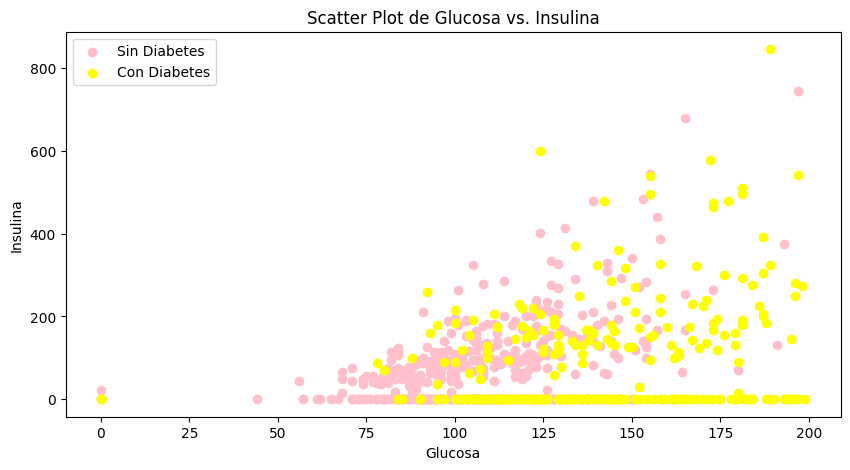

In [18]:
# Separamos las personas según si tiene o no diabetes (Atributo: outcome)
conDiabetes = df[df['Outcome'] == 1]
sinDiabetes = df[df['Outcome'] == 0]

# Creamos Gráfico Scatter Plot de Glucosa vs. Insulina

#Definimos dimensiones del gráfico
plt.figure(figsize=(10, 5))

# Indicamos que datos necesitamos de los dos grupos para hacer el gráfico (Glucosa e insulina)
plt.scatter(sinDiabetes['Glucose'], sinDiabetes['Insulin'], color='pink', label='Sin Diabetes')
plt.scatter(conDiabetes['Glucose'], conDiabetes['Insulin'], color='yellow', label='Con Diabetes')

# Añadimos los textos al gráfico
plt.title('Scatter Plot de Glucosa vs. Insulina')
plt.xlabel('Glucosa')
plt.ylabel('Insulina')
plt.legend()

# Exponemos
plt.show()


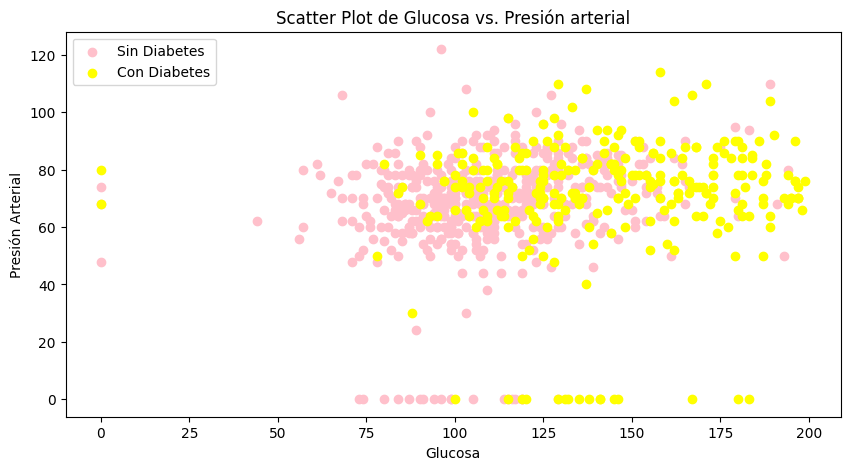

In [19]:
# # Creamos Gráfico Scatter Plot de Glucosa y Presión Arterial

#Definimos dimensiones del gráfico
plt.figure(figsize=(10, 5))

# Indicamos que datos necesitamos de los dos grupos para hacer el gráfico (Glucosa y Presión arterial)

plt.scatter(sinDiabetes['Glucose'], sinDiabetes['BloodPressure'], color='pink', label='Sin Diabetes')
plt.scatter(Diabetes['Glucose'], Diabetes['BloodPressure'], color='yellow', label='Con Diabetes')

# Añadimos los textos al gráfico
plt.title('Scatter Plot de Glucosa vs. Presión arterial')
plt.xlabel('Glucosa')
plt.ylabel('Presión Arterial')
plt.legend()

# Exponemos
plt.show()

2. Dos diagramas de caja, donde se separan los pacientes en cuartiles según su edad y según si tienen o no diabetes, midiendo su nivel de glucosa y BMI (IMC).

3. Dos diagramas de violín con las mismas separaciones anteriores, esta vez mostrando los datos de insulina y espesor de la piel.


4. Un diagrama de torta, donde se separan a los pacientes en grupos de 10 años (21 a 30 años, 31 a 40 años, etc…) y se muestra la cantidad de pacientes en cada grupo.

5. Un gráfico de múltiples ejes mostrando todos los datos, separando los casos con y sin diabetes.      
